## house prices
#### Alberto Carlos Navarrete Garcia

### Import necessary libraries



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Loading  data

In [46]:
df = pd.read_csv('house_prices.csv')


In [47]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [49]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Cleaning

In [50]:
df['date'] = pd.to_datetime(df['date'])


In [51]:
price_99 = df['price'].quantile(0.99)
df = df[df['price'] <= price_99]

In [52]:
df['house_age'] = 2023 - df['yr_built']  # Update year as needed


### Exploratory Data Analysis (10+ Visualizations)


### Price Distribution

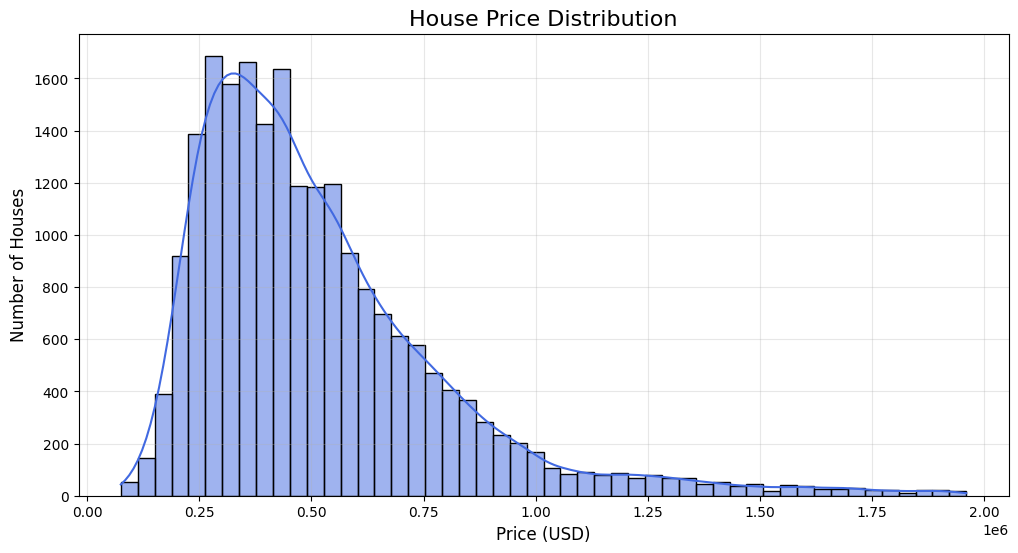

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df['price'], bins=50, color='royalblue', kde=True)
plt.title('House Price Distribution', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Price by Bedrooms

C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\2162338247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette='viridis')


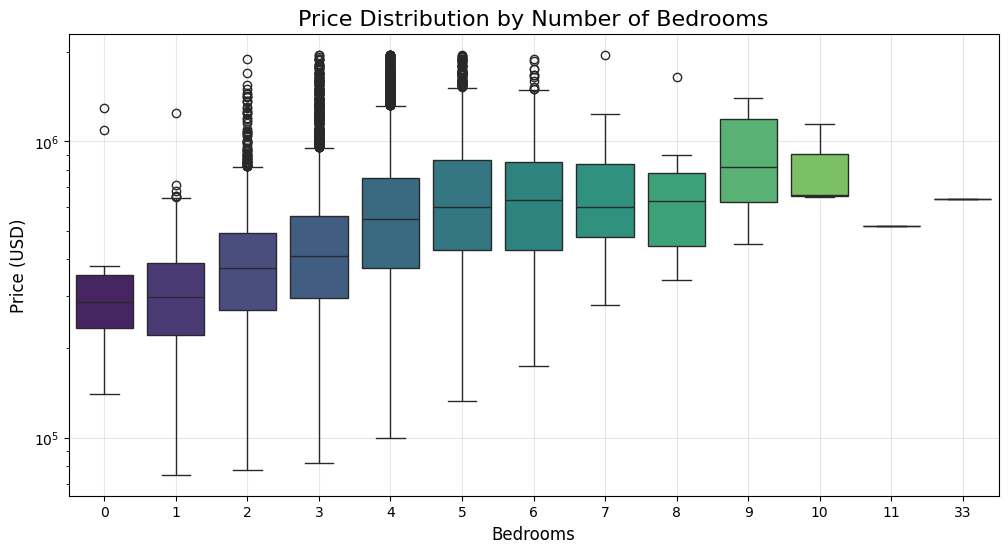

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Number of Bedrooms', fontsize=16)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')  # For better visualization
plt.grid(alpha=0.3)
plt.show()

### Living Area vs Price

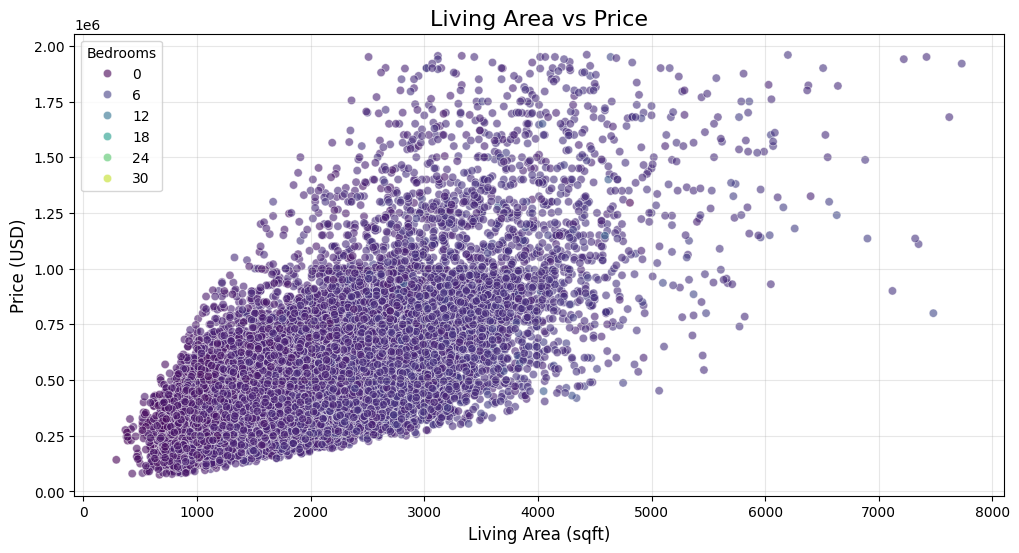

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='sqft_living', y='price', data=df,  hue='bedrooms', palette='viridis', alpha=0.6)
plt.title('Living Area vs Price', fontsize=16)
plt.xlabel('Living Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Bedrooms')
plt.show()

### Waterfront Impact

C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\4237109633.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='waterfront', y='price', data=df, ci=None, palette='coolwarm')
C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\4237109633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waterfront', y='price', data=df, ci=None, palette='coolwarm')


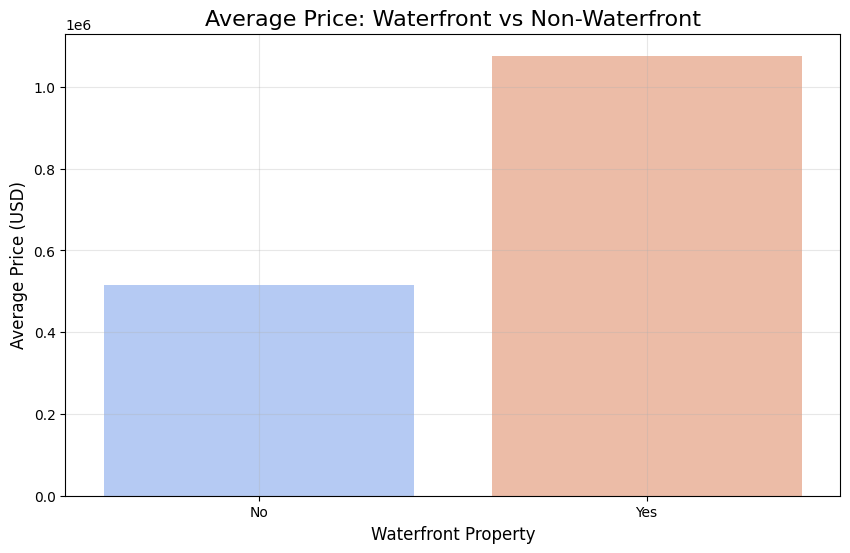

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='waterfront', y='price', data=df, ci=None, palette='coolwarm')
plt.title('Average Price: Waterfront vs Non-Waterfront', fontsize=16)
plt.xlabel('Waterfront Property', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks([0,1], ['No','Yes'])
plt.grid(alpha=0.3)
plt.show()

###  Correlation Matrix

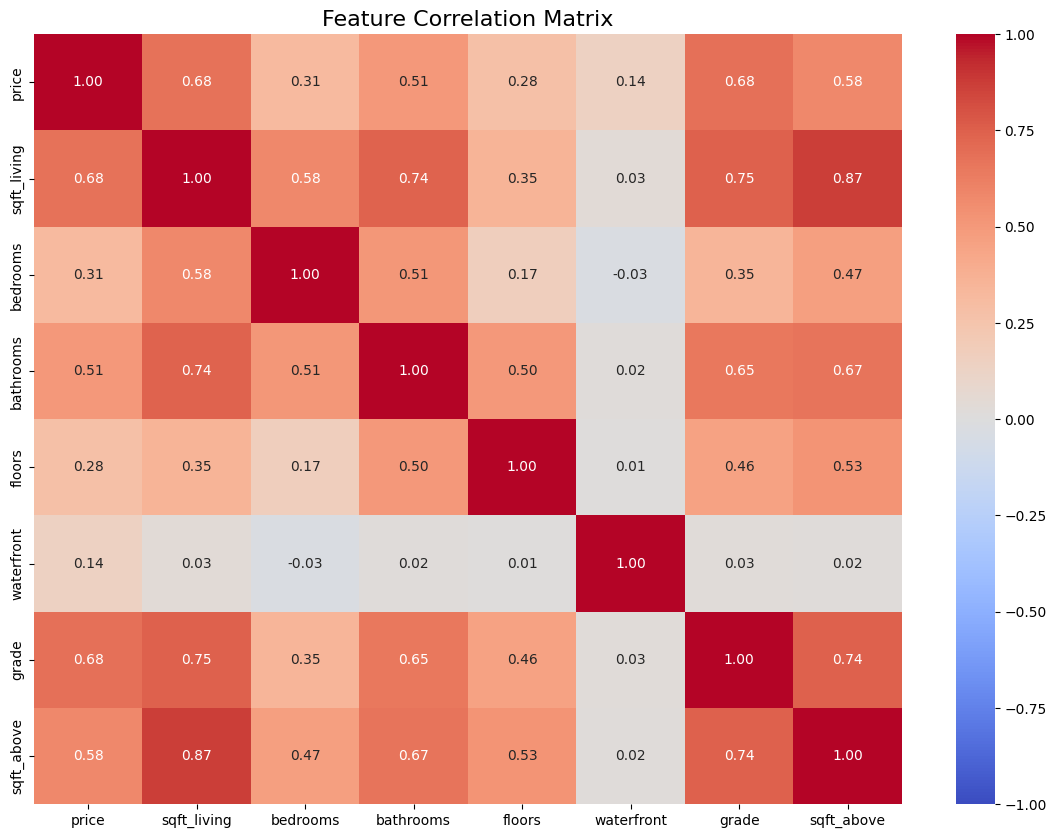

In [57]:
plt.figure(figsize=(14,10))
corr = df[['price','sqft_living','bedrooms','bathrooms','floors','waterfront','grade','sqft_above']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

### Price by House Grade

C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\3073119194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='price', data=df, palette='Spectral')


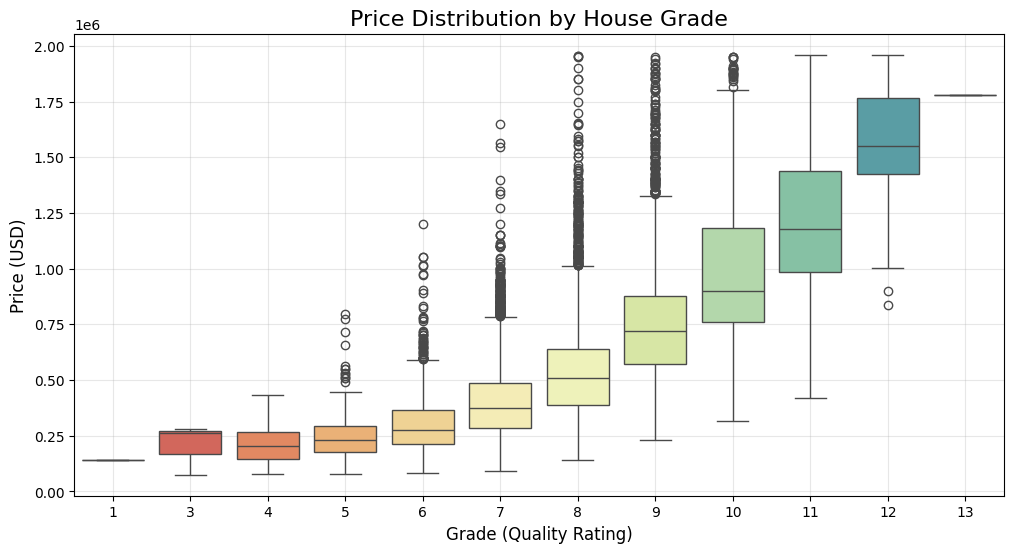

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x='grade', y='price', data=df, palette='Spectral')
plt.title('Price Distribution by House Grade', fontsize=16)
plt.xlabel('Grade (Quality Rating)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Price by Condition

C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\1393418466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='condition', y='price', data=df, palette='Set2')


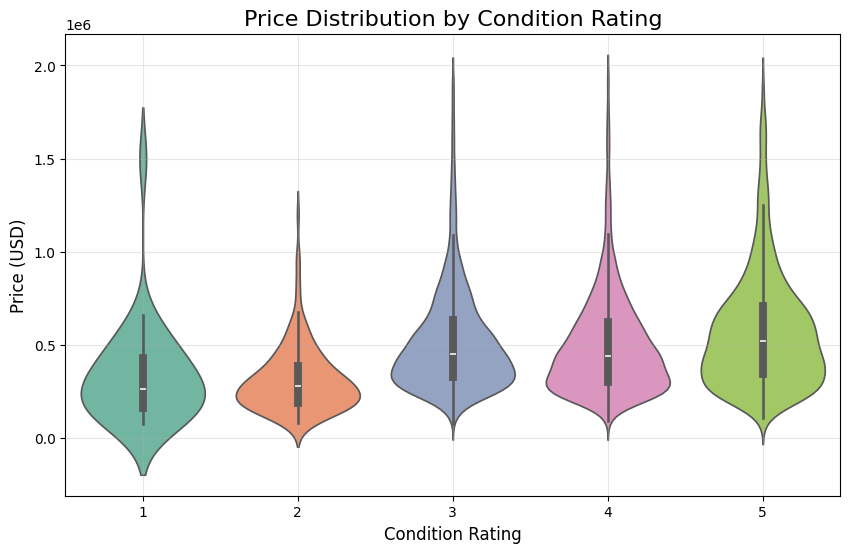

In [59]:
plt.figure(figsize=(10,6))
sns.violinplot(x='condition', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Condition Rating', fontsize=16)
plt.xlabel('Condition Rating', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Floors vs Price

C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\1729160217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floors', y='price', data=df, palette='pastel')


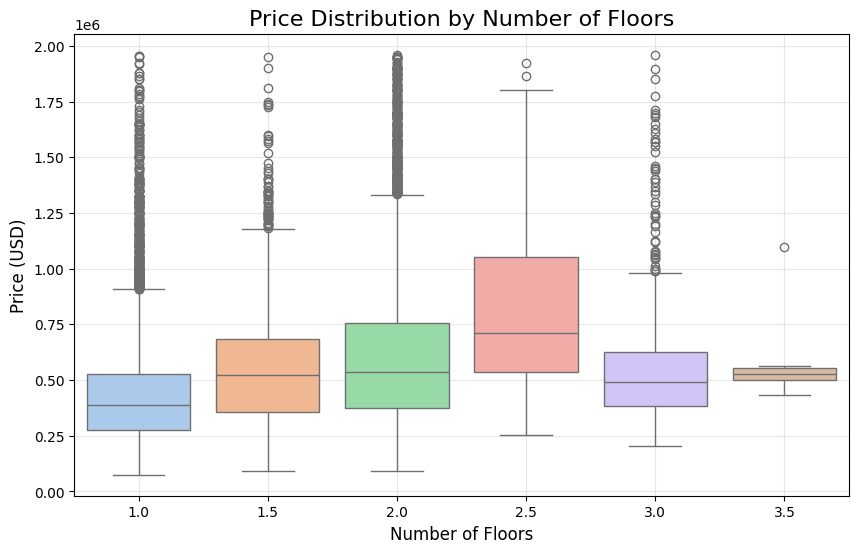

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x='floors', y='price', data=df, palette='pastel')
plt.title('Price Distribution by Number of Floors', fontsize=16)
plt.xlabel('Number of Floors', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### View Quality Impact

C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\1719904671.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='view', y='price', data=df, ci=None, palette='rocket')
C:\Users\carlo\AppData\Local\Temp\ipykernel_14188\1719904671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='view', y='price', data=df, ci=None, palette='rocket')


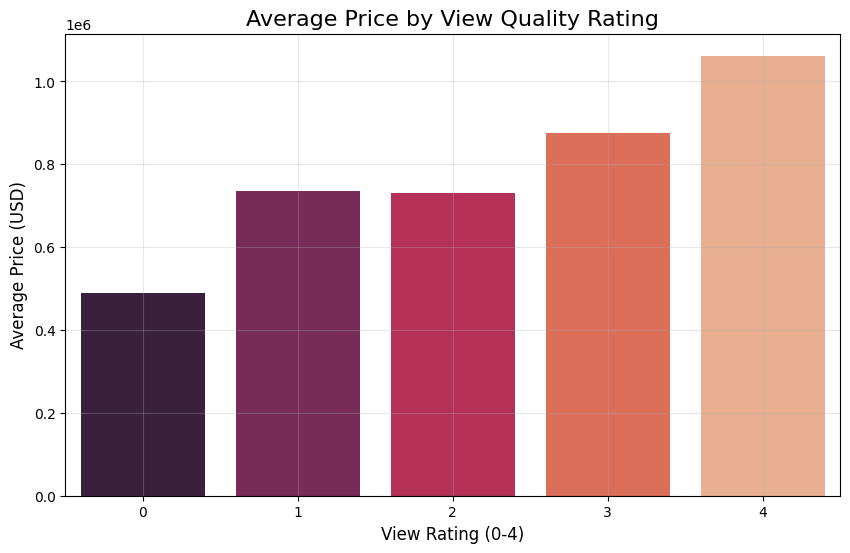

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='view', y='price', data=df, ci=None, palette='rocket')
plt.title('Average Price by View Quality Rating', fontsize=16)
plt.xlabel('View Rating (0-4)', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Feature Selection & Model Building

In [62]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 
            'waterfront', 'view', 'grade', 'sqft_above', 'house_age']
X = df[features]
y = df['price']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_pred = model.predict(X_test)


### Model Evaluation


In [66]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [67]:
pd.DataFrame({'Metric': ['RMSE', 'R² Score'],'Value': [f"${rmse:,.2f}", f"{r2:.4f}"]})

,Metric,Value
0,RMSE,"$172,290.30"
1,R² Score,0.6268


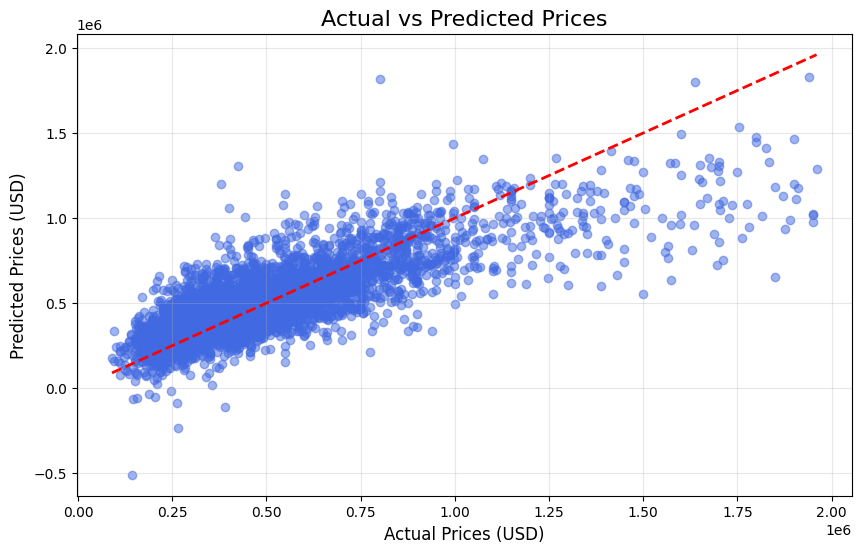

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         '--', color='red', linewidth=2)
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.xlabel('Actual Prices (USD)', fontsize=12)
plt.ylabel('Predicted Prices (USD)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [69]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)